# Library

In [146]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load Data

In [147]:
df = pd.read_csv('CarData.csv')
df

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,XUV500 W8 [2015-2017],850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179.0,7.0,70.0
2055,Hyundai,Eon D-Lite +,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,5.0,32.0
2056,Ford,Figo Duratec Petrol ZXI 1.2,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,5.0,45.0
2057,BMW,5-Series 520d Luxury Line [2017-2019],4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995.0,5.0,65.0


# Data Processing

In [148]:
df = df.drop(columns='Model')

In [149]:
df.columns = df.columns.str.strip()

In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Price               2059 non-null   int64  
 2   Year                2059 non-null   int64  
 3   Kilometer           2059 non-null   int64  
 4   Fuel Type           2059 non-null   object 
 5   Transmission        2059 non-null   object 
 6   Location            2059 non-null   object 
 7   Color               2059 non-null   object 
 8   Owner               2059 non-null   object 
 9   Seller Type         2059 non-null   object 
 10  Engine              1979 non-null   float64
 11  Seating Capacity    1995 non-null   float64
 12  Fuel Tank Capacity  1946 non-null   float64
dtypes: float64(3), int64(3), object(7)
memory usage: 209.2+ KB


In [151]:
df.isna().sum()

Make                    0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [152]:
missingval_col = ['Engine', 'Seating Capacity', 'Fuel Tank Capacity']

imputer = KNNImputer(n_neighbors=5)
df[missingval_col] = imputer.fit_transform(df[missingval_col])

In [153]:
df.describe()

,Price,Year,Kilometer,Engine,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,2059.000000,2059.000000,2059.000000
mean,1.702992e+06,2016.425449,5.422471e+04,1694.692877,5.306266,52.282904
std,2.419881e+06,3.363564,5.736172e+04,631.952248,0.809285,14.892061
min,4.900000e+04,1988.000000,0.000000e+00,624.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,1198.000000,5.000000,42.000000
50%,8.250000e+05,2017.000000,5.000000e+04,1498.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,1995.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,6592.000000,8.000000,105.000000


In [154]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995.0,5.0,65.0


# Exploratory Data Analysis

In [155]:
df_copy = df.copy()

numerical_col = ['Price', 'Year', 'Kilometer', 'Engine', 'Seating Capacity', 'Fuel Tank Capacity']
categorical_col = ['Make', 'Fuel Type', 'Transmission', 'Location', 'Color', 'Owner', 'Seller Type']

## Data Distribution and Box Plot

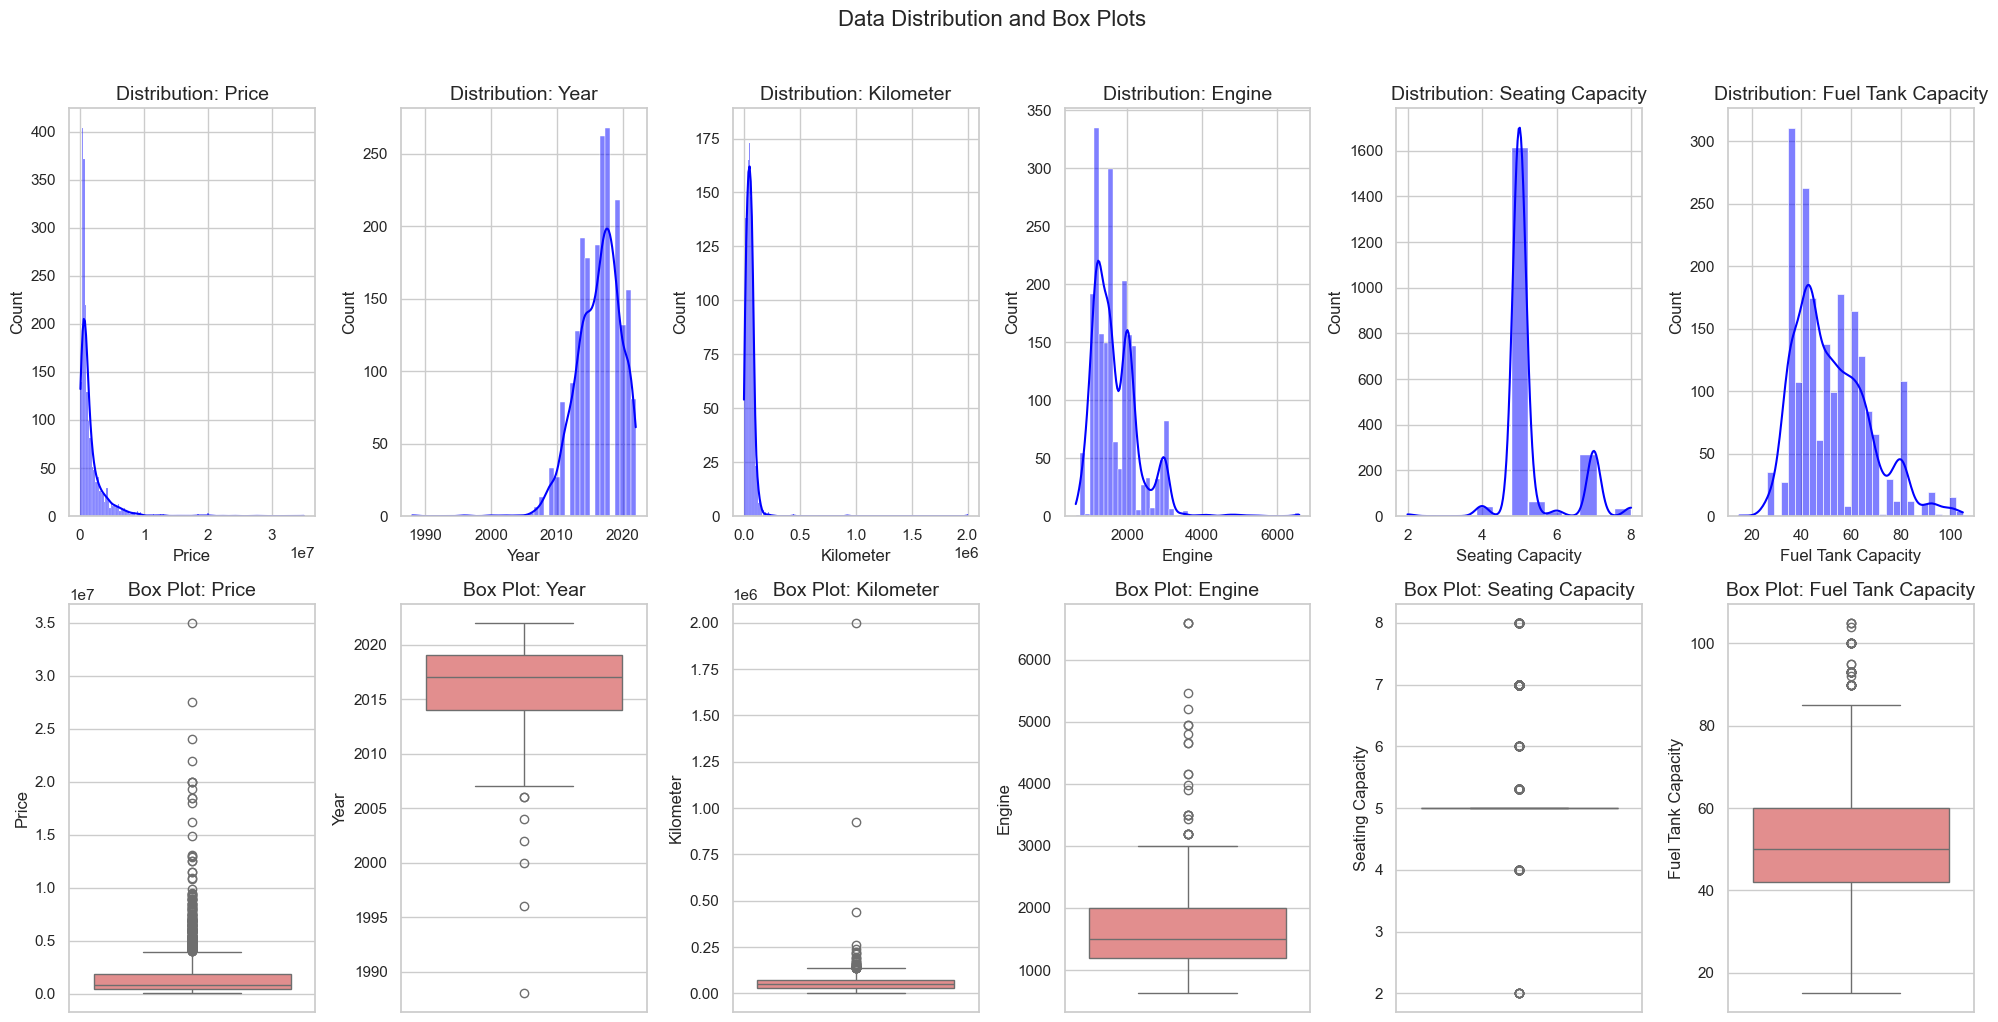

In [156]:
sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(nrows=2, ncols=len(numerical_col), figsize=(20, 10))
fig.suptitle("Data Distribution and Box Plots", fontsize=16, y=1.02)

for i, col in enumerate(numerical_col):
    # Distribution Plot
    sns.histplot(df_copy[col], kde=True, ax=axes[0, i], color="blue")
    axes[0, i].set_title(f"Distribution: {col}", fontsize=14)
    
    # Box Plot
    sns.boxplot(y=df_copy[col], ax=axes[1, i], color="lightcoral")
    axes[1, i].set_title(f"Box Plot: {col}", fontsize=14)

plt.tight_layout()
plt.show()

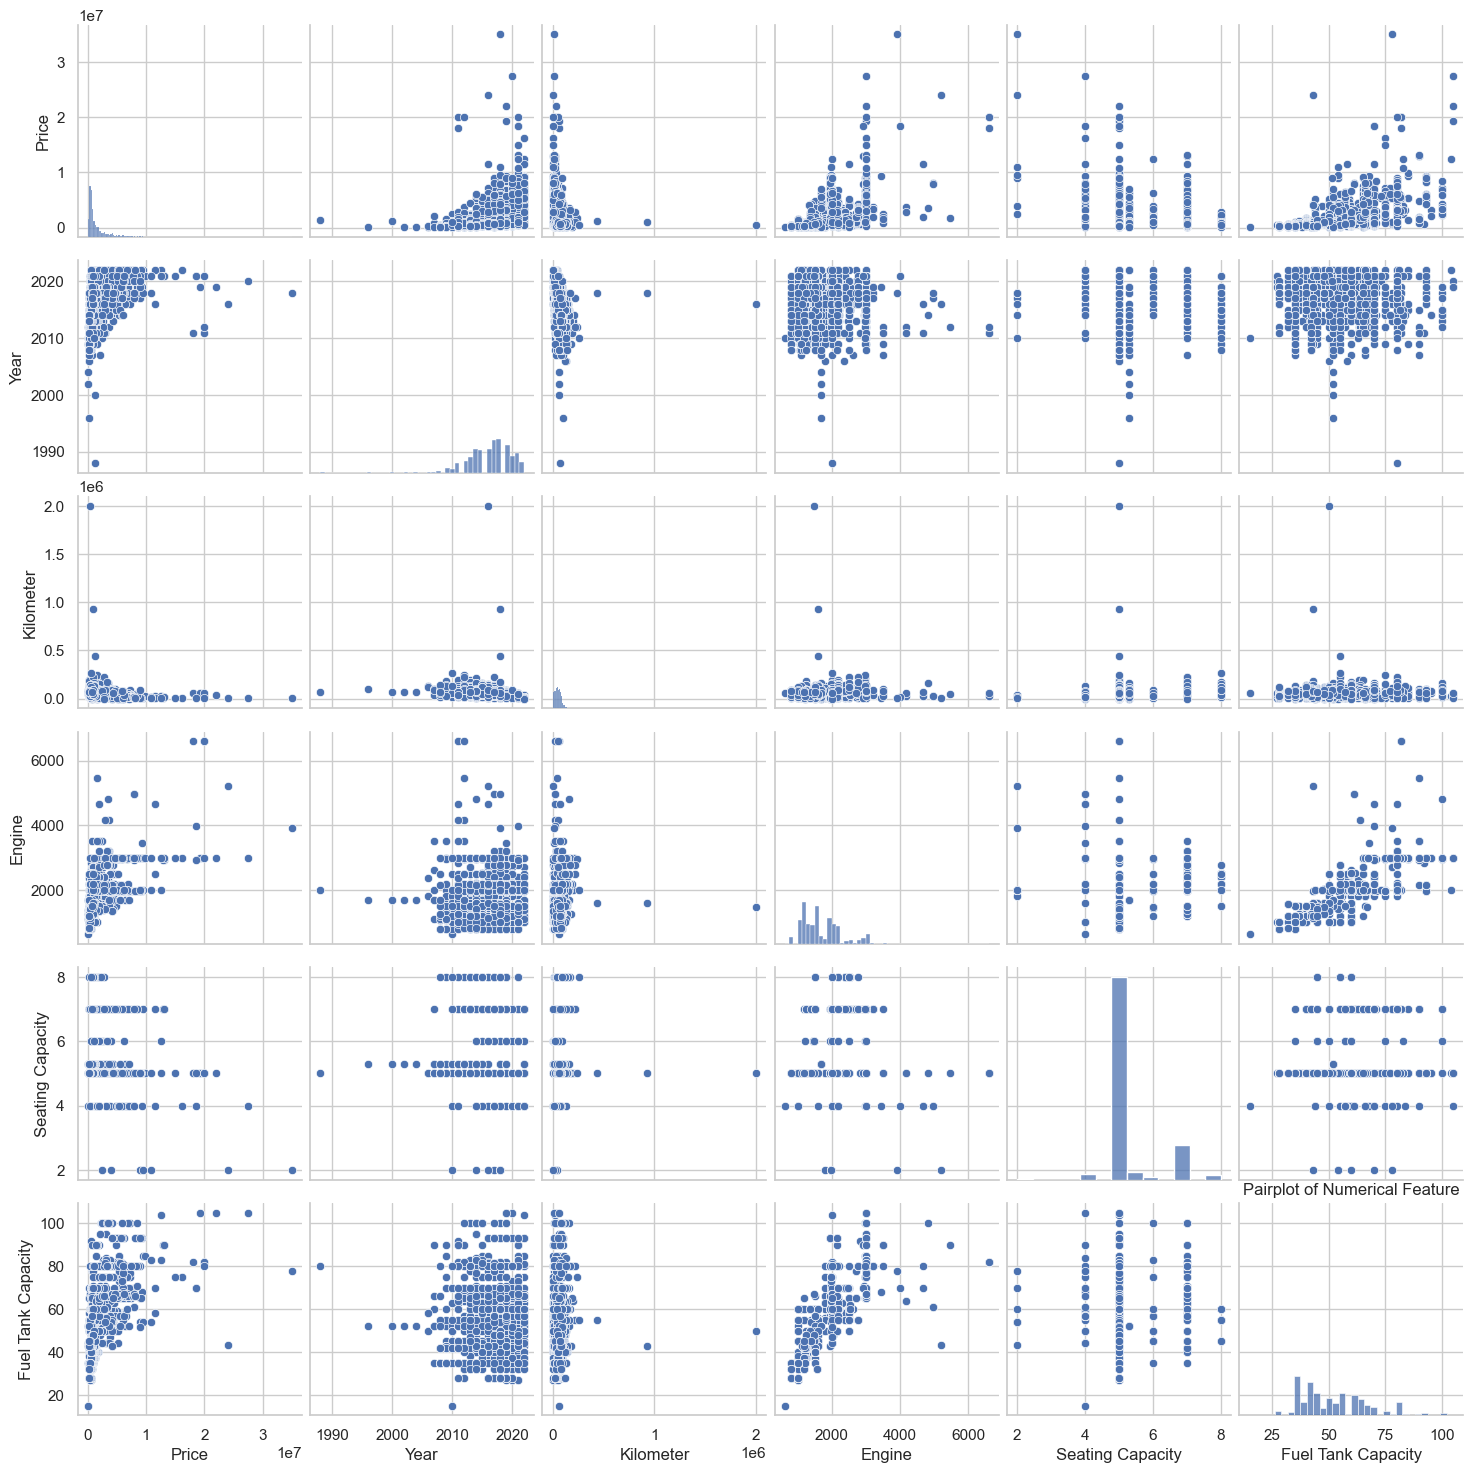

In [157]:
sns.set_theme(style="whitegrid")
sns.pairplot(df_copy[numerical_col])
plt.title('Pairplot of Numerical Feature')
plt.show()

# Data Split

In [158]:
df

,Make,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,Honda,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198.0,5.0,35.0
1,Maruti Suzuki,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248.0,5.0,42.0
2,Hyundai,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197.0,5.0,35.0
3,Toyota,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197.0,5.0,37.0
4,Toyota,1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393.0,7.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2054,Mahindra,850000,2016,90300,Diesel,Manual,Surat,White,First,Individual,2179.0,7.0,70.0
2055,Hyundai,275000,2014,83000,Petrol,Manual,Ahmedabad,White,Second,Individual,814.0,5.0,32.0
2056,Ford,240000,2013,73000,Petrol,Manual,Thane,Silver,First,Individual,1196.0,5.0,45.0
2057,BMW,4290000,2018,60474,Diesel,Automatic,Coimbatore,White,First,Individual,1995.0,5.0,65.0


In [159]:
X = df.drop(columns='Price')
y = df['Price']

# Feature Engineering

In [160]:
numerical_col.remove('Price')

In [161]:
scaler = MinMaxScaler()

X[numerical_col] = scaler.fit_transform(X[numerical_col])
y = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [162]:
lb = LabelEncoder()

for col in categorical_col:
    X[col] = lb.fit_transform(X[col])

In [163]:
X

,Make,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Seating Capacity,Fuel Tank Capacity
0,7,0.852941,0.043575,6,1,56,7,1,1,0.096180,0.500000,0.222222
1,19,0.764706,0.037500,2,1,40,15,3,2,0.104558,0.500000,0.300000
2,8,0.676471,0.033500,6,1,39,8,1,2,0.096012,0.500000,0.222222
3,30,0.911765,0.018750,6,1,41,13,1,2,0.096012,0.500000,0.244444
4,30,0.882353,0.034500,2,1,45,7,1,2,0.296414,0.833333,0.444444
...,...,...,...,...,...,...,...,...,...,...,...,...
2054,18,0.823529,0.045150,2,1,67,15,1,2,0.260556,0.833333,0.611111
2055,8,0.764706,0.041500,6,1,1,15,3,2,0.031836,0.500000,0.188889
2056,6,0.735294,0.036500,6,1,68,14,1,2,0.095845,0.500000,0.333333
2057,1,0.882353,0.030237,2,0,12,15,1,2,0.229725,0.500000,0.555556


In [164]:
y

array([[0.01304684],
       [0.01147321],
       [0.00489256],
       ...,
       [0.00546479],
       [0.12134131],
       [0.01776773]])

# Train-Test Split

In [165]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training

In [166]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train.ravel())

RandomForestRegressor(random_state=42)

# Prediction

In [167]:
y_pred = model.predict(X_test)

# Evaluation

In [168]:
# 1. Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# 2. Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# 3. Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# 4. R-Squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-Squared (R2): {r2}")

# 5. Adjusted R-Squared
# Assuming X_test is your test feature set
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f"Adjusted R-Squared: {adjusted_r2}")

Mean Absolute Error (MAE): 0.011401785898315897
Mean Squared Error (MSE): 0.0015019048569043666
Root Mean Squared Error (RMSE): 0.038754417256673675
R-Squared (R2): 0.7373874297592771
Adjusted R-Squared: 0.7294893073460222


# Actual vs Predictd Graph

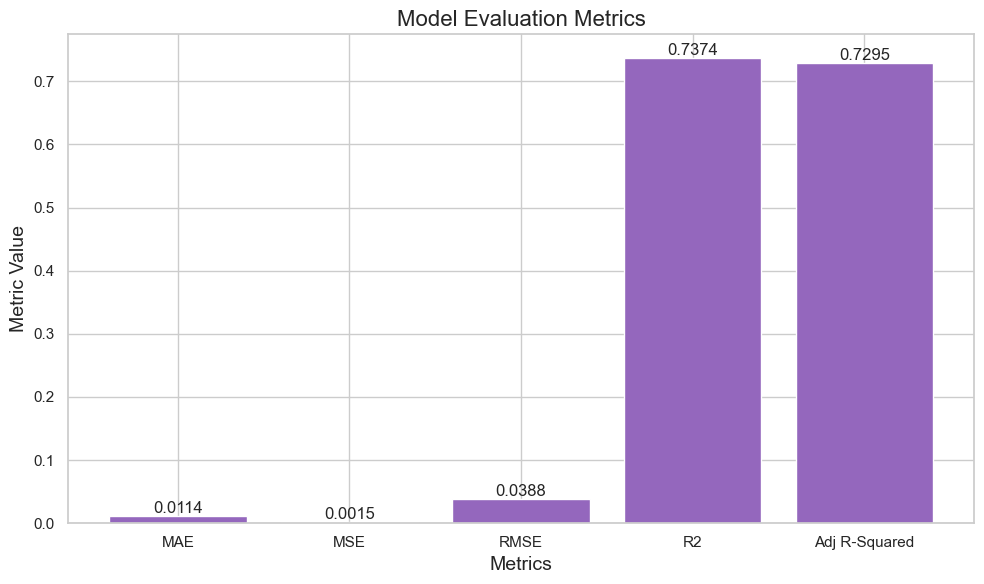

In [169]:
# Metrics (already computed)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
n = X_test.shape[0]  # Number of samples
p = X_test.shape[1]  # Number of predictors
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Prepare data for the bar chart
metric_names = [
    "MAE",
    "MSE",
    "RMSE",
    "R2",
    "Adj R-Squared"
]
metric_values = [mae, mse, rmse, r2, adjusted_r2]

# Creating the vertical bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(metric_names, metric_values, color='#9467bd')

# Adding value labels to the bars
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # Position of the label
        bar.get_height(),  # Height of the bar (the value)
        f'{bar.get_height():.4f}',  # Label text
        ha='center',  # Horizontal alignment
        va='bottom'  # Vertical alignment
    )

# Adding titles and labels
plt.title("Model Evaluation Metrics", fontsize=16)
plt.ylabel("Metric Value", fontsize=14)
plt.xlabel("Metrics", fontsize=14)

# Displaying the chart with tight layout for better spacing
plt.tight_layout()
plt.show()